<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/PROYECTO/Project_Exploratory_MiquelBatalla/Project_Exploratory_MiquelBatalla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Parte 1: Base de datos


In [2]:
import pandas as pd
from google.colab import drive
import seaborn as sns
import matplotlib.pyplot as plt

drive.mount('/content/gdrive')
dm = pd.read_csv('/content/gdrive/My Drive/Postgrau IML/Dades Machine Learning/kaggle_diamonds.csv',index_col=0,header=0)
dm.head()

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


carat      cut color clarity  depth  table  price     x     y     z
1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98  2.43
2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84  2.31
3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07  2.31
4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23  2.63
5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35  2.75

In [3]:
dm['box']=dm['x']*dm['y']*dm['z']
dm.describe()

carat         depth  ...             z           box
count  53940.000000  53940.000000  ...  53940.000000  53940.000000
mean       0.797940     61.749405  ...      3.538734    129.849403
std        0.474011      1.432621  ...      0.705699     78.245262
min        0.200000     43.000000  ...      0.000000      0.000000
25%        0.400000     61.000000  ...      2.910000     65.136830
50%        0.700000     61.800000  ...      3.530000    114.808572
75%        1.040000     62.500000  ...      4.040000    170.842451
max        5.010000     79.000000  ...     31.800000   3840.598060

[8 rows x 8 columns]

In [0]:
dm.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
box        0
dtype: int64

Observamos que disponemos de 10 variables, 7 de ellas numéricas, y con 53,940 observaciones sin ausencias (NaNs). También añadimos la variable "box", que puede relacionarse con las dimensiones "x", "y" y "z".

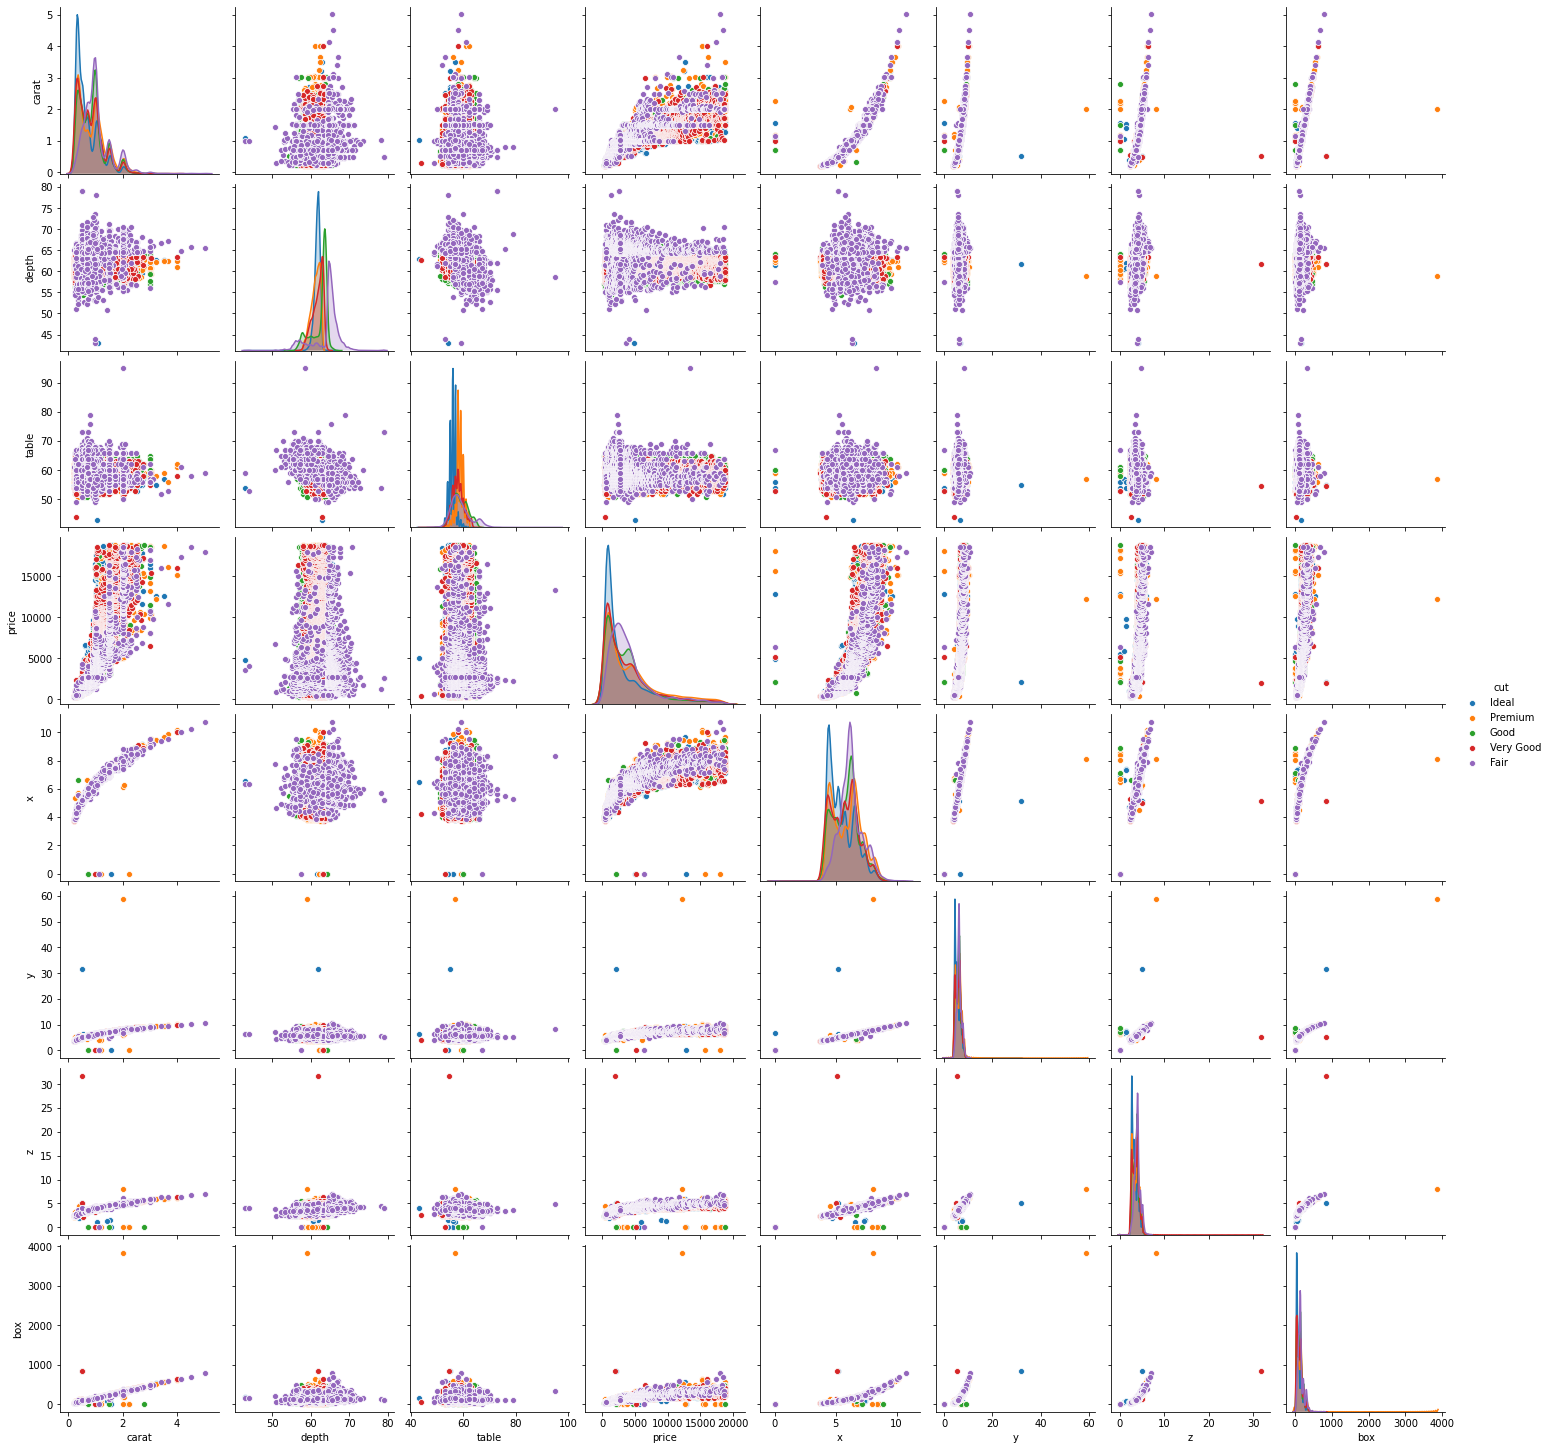

In [0]:
sns.pairplot(dm,hue='cut')

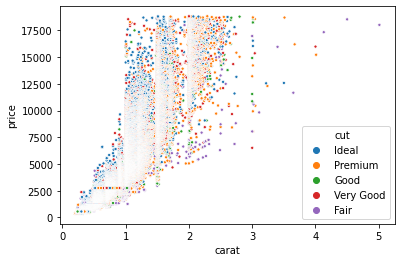

In [0]:
sns.scatterplot(x='carat',y='price',hue='cut',data=dm,s=10)

De los gráficos observamos posibles relaciones entre las variables precio, carat y las dimensiones (x, y, z y box), junto con una posible relación de agrupamiento con la variable cut. También se aprecian algunas observaciones muy distantes del resto.

In [0]:
dm[['cut','carat']].groupby(by='cut').count()

carat
cut             
Fair        1610
Good        4906
Ideal      21551
Premium    13791
Very Good  12082

También vemos que el número de observaciones para cada grupo es de un orden de magnitud similar.

# Parte 2: Exploración con Pandas

**Pregunta 1:** cuál es el tipo de corte más caro (de media)?



In [0]:
dm.groupby(by='cut').mean().sort_values(by=('price'), ascending=False)

carat      depth      table  ...         y         z         box
cut                                        ...                                
Premium    0.891955  61.264673  58.746095  ...  5.944879  3.647124  145.052128
Fair       1.046137  64.041677  59.053789  ...  6.182652  3.982770  164.950549
Very Good  0.806381  61.818275  57.956150  ...  5.770026  3.559801  130.999722
Good       0.849185  62.365879  58.694639  ...  5.850744  3.639507  136.257267
Ideal      0.702837  61.709401  55.951668  ...  5.520080  3.401448  115.394912

[5 rows x 8 columns]

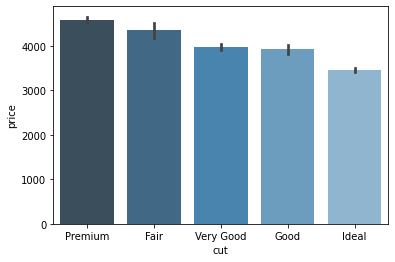

In [0]:
from numpy import average
sns.barplot(x='cut',y='price',data=dm,estimator=average,order=['Premium','Fair','Very Good','Good','Ideal'],palette="Blues_d")

**Respuesta 1:** El tipo de corte más caro (de media) es el Premium, seguido por el Fair

**Pregunta 2:** Para cada categoria de color, cuál es el diamante con más carats?

In [0]:
dm.groupby(by='color').max().sort_values(by=('price'), ascending=False)

carat        cut clarity  depth  ...      x      y      z          box
color                                   ...                                  
I       4.01  Very Good    VVS2   71.3  ...  10.14  10.10   6.31   631.894380
G       3.01  Very Good    VVS2   72.9  ...   9.44   9.37   6.16   497.104736
H       4.13  Very Good    VVS2   71.8  ...  10.00  58.90   8.06  3840.598060
F       3.01  Very Good    VVS2   71.0  ...   9.24   9.13   5.73   483.389676
E       3.05  Very Good    VVS2   79.0  ...   9.26  31.80  31.80   838.502400
J       5.01  Very Good    VVS2   73.6  ...  10.74  10.54   6.98   790.133208
D       3.40  Very Good    VVS2   71.6  ...   9.42   9.34   6.27   551.652156

[7 rows x 10 columns]

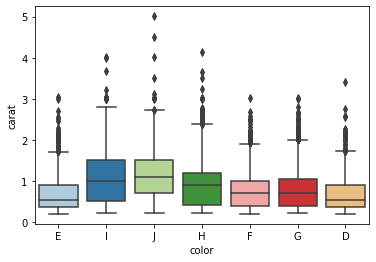

In [0]:
from numpy import maximum
sns.boxplot(x='color',y='carat',data=dm,palette='Paired')

**Respuesta 2:** en la tabla vemos el numero de carats máximo para un diamante en cada categoria. El máximo de carats que se registran en los datos es de un diamante de color "J", cuyo precio es de $18,710. En el gráfico también vemos la distribución de carats por color, siendo J el que tiene una media superior a los demás.

**Pregunta 3**: de media, cuál es la categoria de claridad más asequible?

In [0]:
dm.groupby(by='clarity').mean().sort_values(by=('price'), ascending=True)

carat      depth      table  ...         y         z         box
clarity                                  ...                                
VVS1     0.503321  61.624651  56.884460  ...  4.975075  3.061294   82.549269
IF       0.505123  61.510615  56.507207  ...  4.989827  3.061659   83.259187
VVS2     0.596202  61.663778  57.024990  ...  5.232118  3.221465   97.617606
VS1      0.727158  61.667458  57.315151  ...  5.581828  3.441007  118.844136
I1       1.283846  62.734278  58.303779  ...  6.709379  4.207908  204.526410
VS2      0.763935  61.724417  57.417401  ...  5.658859  3.491478  124.325444
SI1      0.850482  61.853042  57.662541  ...  5.888256  3.639845  138.087700
SI2      1.077648  61.772167  57.927181  ...  6.397826  3.948478  174.904056

[8 rows x 8 columns]

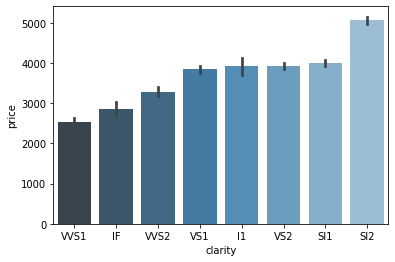

In [0]:
sns.barplot(x='clarity',y='price',data=dm,estimator=average,order=['VVS1','IF','VVS2','VS1','I1','VS2','SI1','SI2'],palette="Blues_d")

**Respuesta 3:** a partir de la tabla anterior observamos que la categoria de claridad más asequible es la "WS1", con un precio medio de $2,523, seguida por la "IF" y la "WS2". Del gráfico también podemos apreciar la similitud de precios en la franja intermedia para las claridades "VS1", "I1", "VS2" y "SI1", cuyo precio medio ronda los 4,000 dólares. Finalmente y con diferencia, la categoria de claridad "SI2" es la más cara, con un valor medio de 5,000 dólares.

# Parte 3: Reducción de dimensionalidad y selección de atributos

### **Reducción a espacios con PCA**

In [0]:
dm.columns

Index(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x', 'y',
       'z', 'box'],
      dtype='object')

In [0]:
from sklearn.preprocessing import StandardScaler
from sklearn import decomposition

X = dm[['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'box']] #features
y = dm['cut'] # class labels
XS = StandardScaler().fit_transform(X)
pca = decomposition.PCA(n_components=8).fit(XS)
Xproj = pca.transform(XS)
Xproj.shape

(53940, 8)

In [0]:
print('Valores propios = {} {} {} {} {} {} {} {}'.format(*pca.explained_variance_))
print('Fracción de la varianza explicada = {} {} {} {} {} {} {} {}'.format(*pca.explained_variance_ratio_))

Valores propios = 5.7287496240783815 1.286820111363546 0.6916231413766788 0.1743502913601769 0.05517828737092999 0.03388944725557591 0.027335825077696642 0.0022015878069539343
Fracción de la varianza explicada = 0.71608042726447 0.16084953185678152 0.08645128991174618 0.021793382382454093 0.006897158051771865 0.004236102371891246 0.003416914786952819 0.0002751933739323516


In [0]:
print('Fracción acumulada de la varianza explicada = {}'.format(100*pca.explained_variance_ratio_.cumsum()))

Fracción acumulada de la varianza explicada = [ 71.60804273  87.69299591  96.3381249   98.51746314  99.20717895
  99.63078918  99.97248066 100.        ]


De la fracción acumulada de la varianza explicada observamos que para explicar más de un 90% no hacen falta **3 componentes principales**.

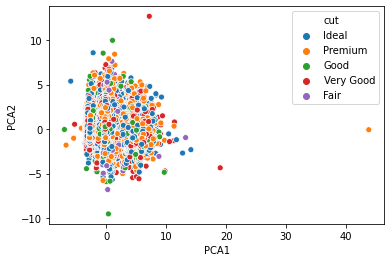

In [0]:
dfpca = pd.DataFrame(Xproj[:,0:3],columns=['PCA1', 'PCA2', 'PCA3'])
ax = sns.scatterplot(x="PCA1", y="PCA2", hue=y,data=dfpca)

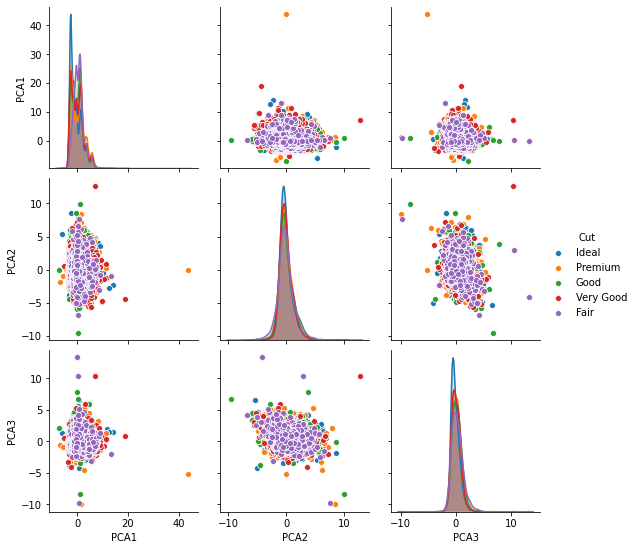

In [0]:
dfpca['Cut']=y
sns.pairplot(dfpca,hue='Cut')

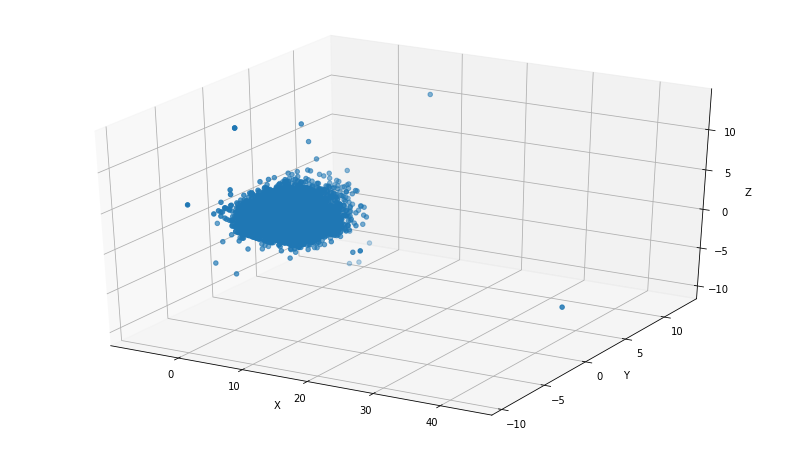

In [0]:
from numpy import *
import matplotlib.pyplot as plot
from mpl_toolkits.mplot3d import Axes3D

# representación gráfica de los datos:
fig = plot.figure(1,figsize=(14, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(dfpca["PCA1"],dfpca["PCA2"],dfpca["PCA3"])
ax.set_xlabel('X ')
ax.set_ylabel('Y ')
ax.set_zlabel('Z ')
plot.show()

### **Selección de atributos**

In [0]:
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE
import matplotlib.pyplot as plt

dm_num =dm.select_dtypes(include='number')

X = dm_num
y = dm['cut'] # Seleccionamos el corte como variable de clase

# Creamos el objeto SVC i seleccionamos 2 variables
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=2, step=1)
rfe.fit(X, y)
print('Kept features: {}'.format(rfe.support_))
print('Raking of the features: {}'.format(rfe.ranking_))

Aplicamos el algoritmo de selección recursiva de atributos y obtenemos los resultados anteriores. Cabe comentar que la ejecución de éste código requirió unas 4 horas de tiempo. Copio los resultados por si se perdieran:

*Kept features: [False False False False  True  True False False]*

*Raking of the features: [5 4 3 7 1 1 2 6]*

In [0]:
X.columns

Index(['carat', 'depth', 'table', 'price', 'x', 'y', 'z', 'box'], dtype='object')

# Parte 4: Análisis de grupos

### **Determinación del número óptimo de grupos**

In [0]:
import numpy as np
from sklearn import mixture
import pandas as pd

dm_num =dm.select_dtypes(include='number')

#X = dfpca[['PCA1', 'PCA2', 'PCA3']]

X = dm_num

NMAX = 10
bic = []
aic=[]
for kG in np.arange(1,NMAX+1):
    gmm = mixture.GaussianMixture(n_components=kG,covariance_type='full').fit(X)
    bic.append(gmm.bic(X))
    aic.append(gmm.aic(X))

num_result = np.argmin(bic)
print(num_result+1)

10


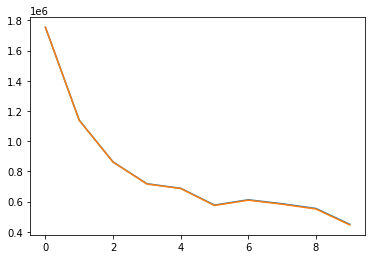

In [0]:
plt.plot(bic)
plt.plot(aic)

Tal y como observamos en el apartado 1 del proyecto, en el conjunto de datos no parece haber una clara diferenciación de clusters. Se observa un posible **único cluster no gausiano**, por la cual cosa el algorismo de gmm parece reducir el número bic i aic continuamente, al intentar forzar la generación de clusters como la suma ponderada de gausiana. Realmente no parece que haya esta distribución en los datos, por la cuál cosa las técnicas de clustring en éste dataframe no parecen aportar mucho valor. 

Aún así, como vemos en el gráfico superior, con **5 clusters** parece existir un mínimo local. Usaremos este valor de 5 clusters para provar las 3 técnicas posteriores (kmeans, gmm y agglomerative) y así comparar su resultado.

### **Comparación de los algorismos Kmeans, GMM y agglomerative cluster**

En este apartado, y por el gran requerimiento de RAM de alguno de los algorismos usaremos una versión reducida del dataframe inicial, con un 5% de los datos originales escogidos aleatoriamente. De ésta forma los 3 algorismos usaran el mismo número de observaciones.

In [6]:
#Reducción al 5% del dataframe y elección de variables numéricas

dm_red=dm.sample(frac=0.05, random_state=1).select_dtypes(include='number')
X=dm_red

print(dm.shape)
print(dm_red.shape)

(53940, 11)
(2697, 8)


Una vez creado el dataframe reducido, aplicamos las 3 técnicas de clustering mencionadas generado 5 clusters tal y como se comenta en el apartado anterior y representamos su resultado en un pairplot.

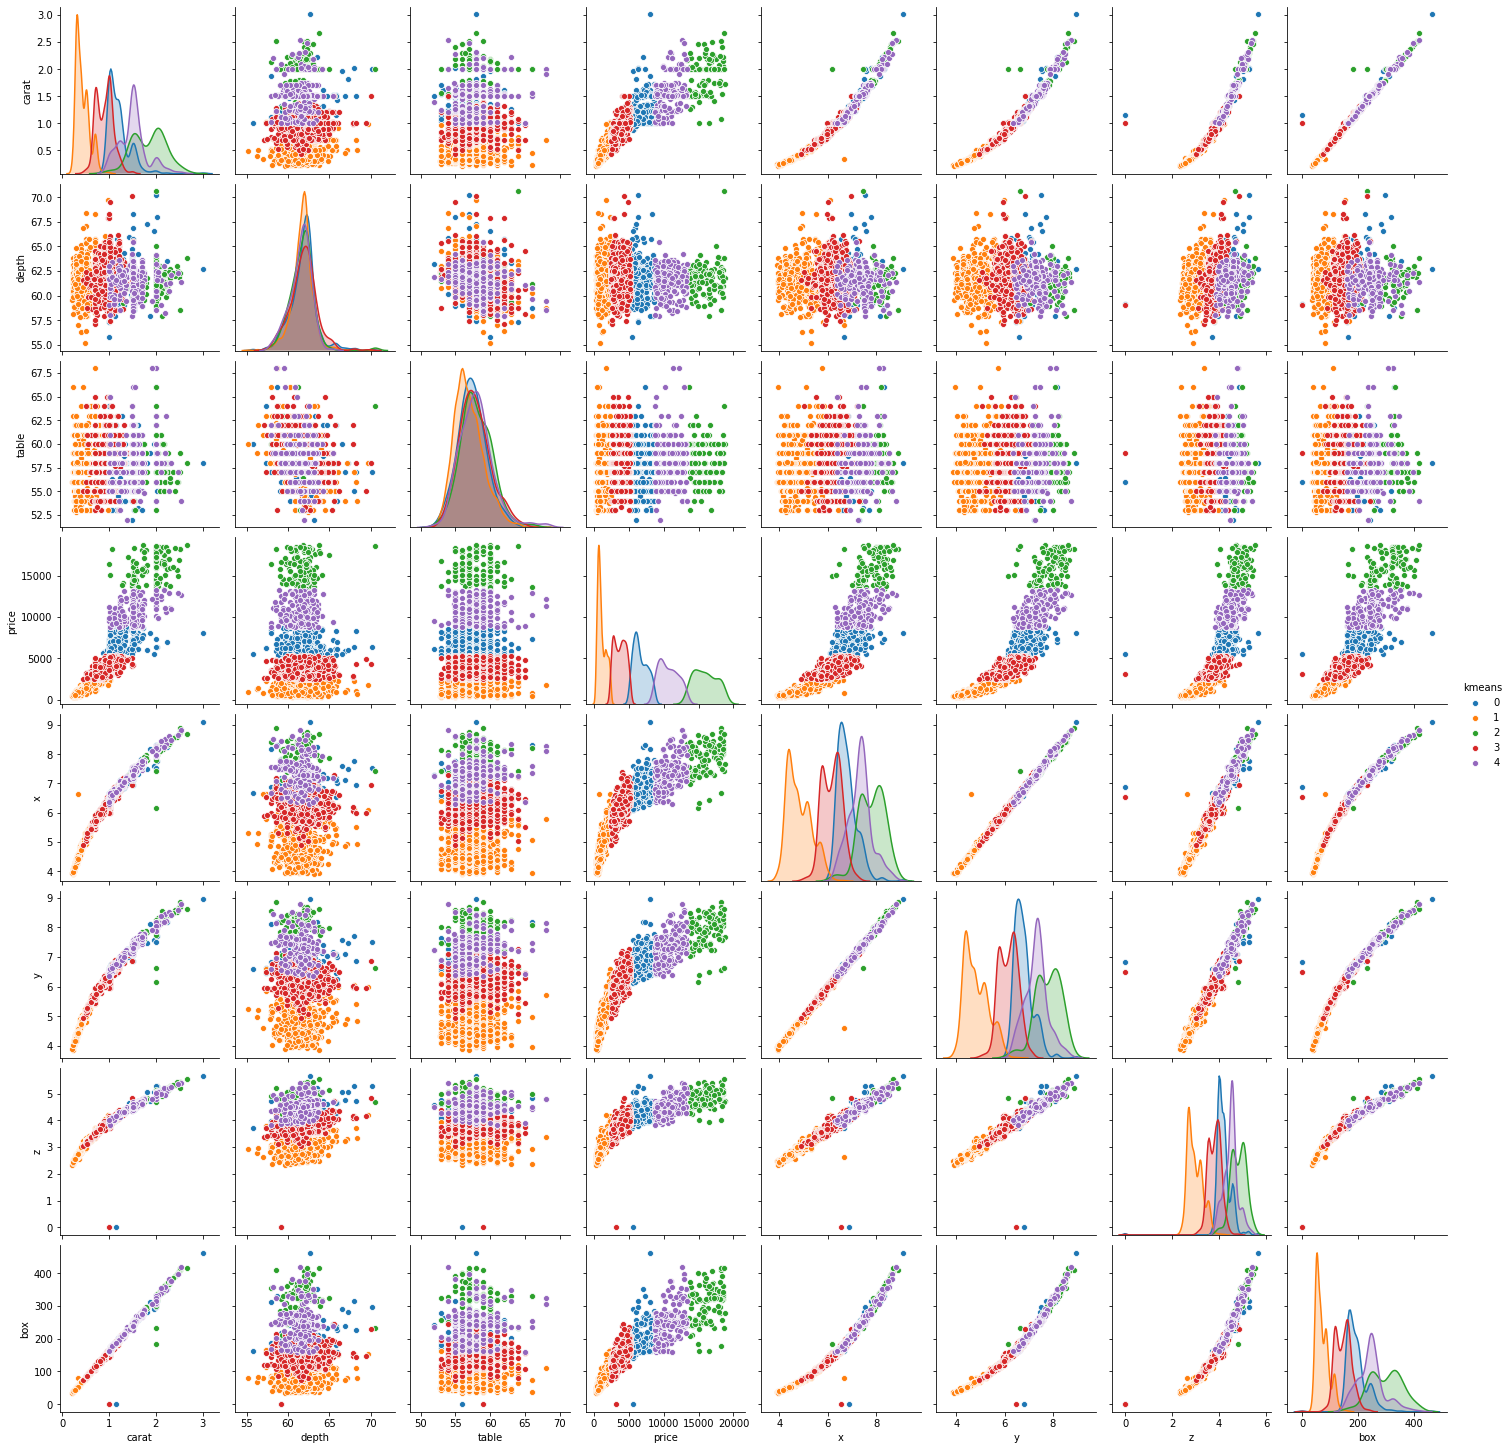

In [0]:
# Kmeans clustering

from sklearn.cluster import KMeans

clust_kmeans = KMeans(n_clusters=5, random_state=200).fit(X)
X['kmeans']=clust_kmeans.fit_predict(X)

sns.pairplot(X,hue='kmeans')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


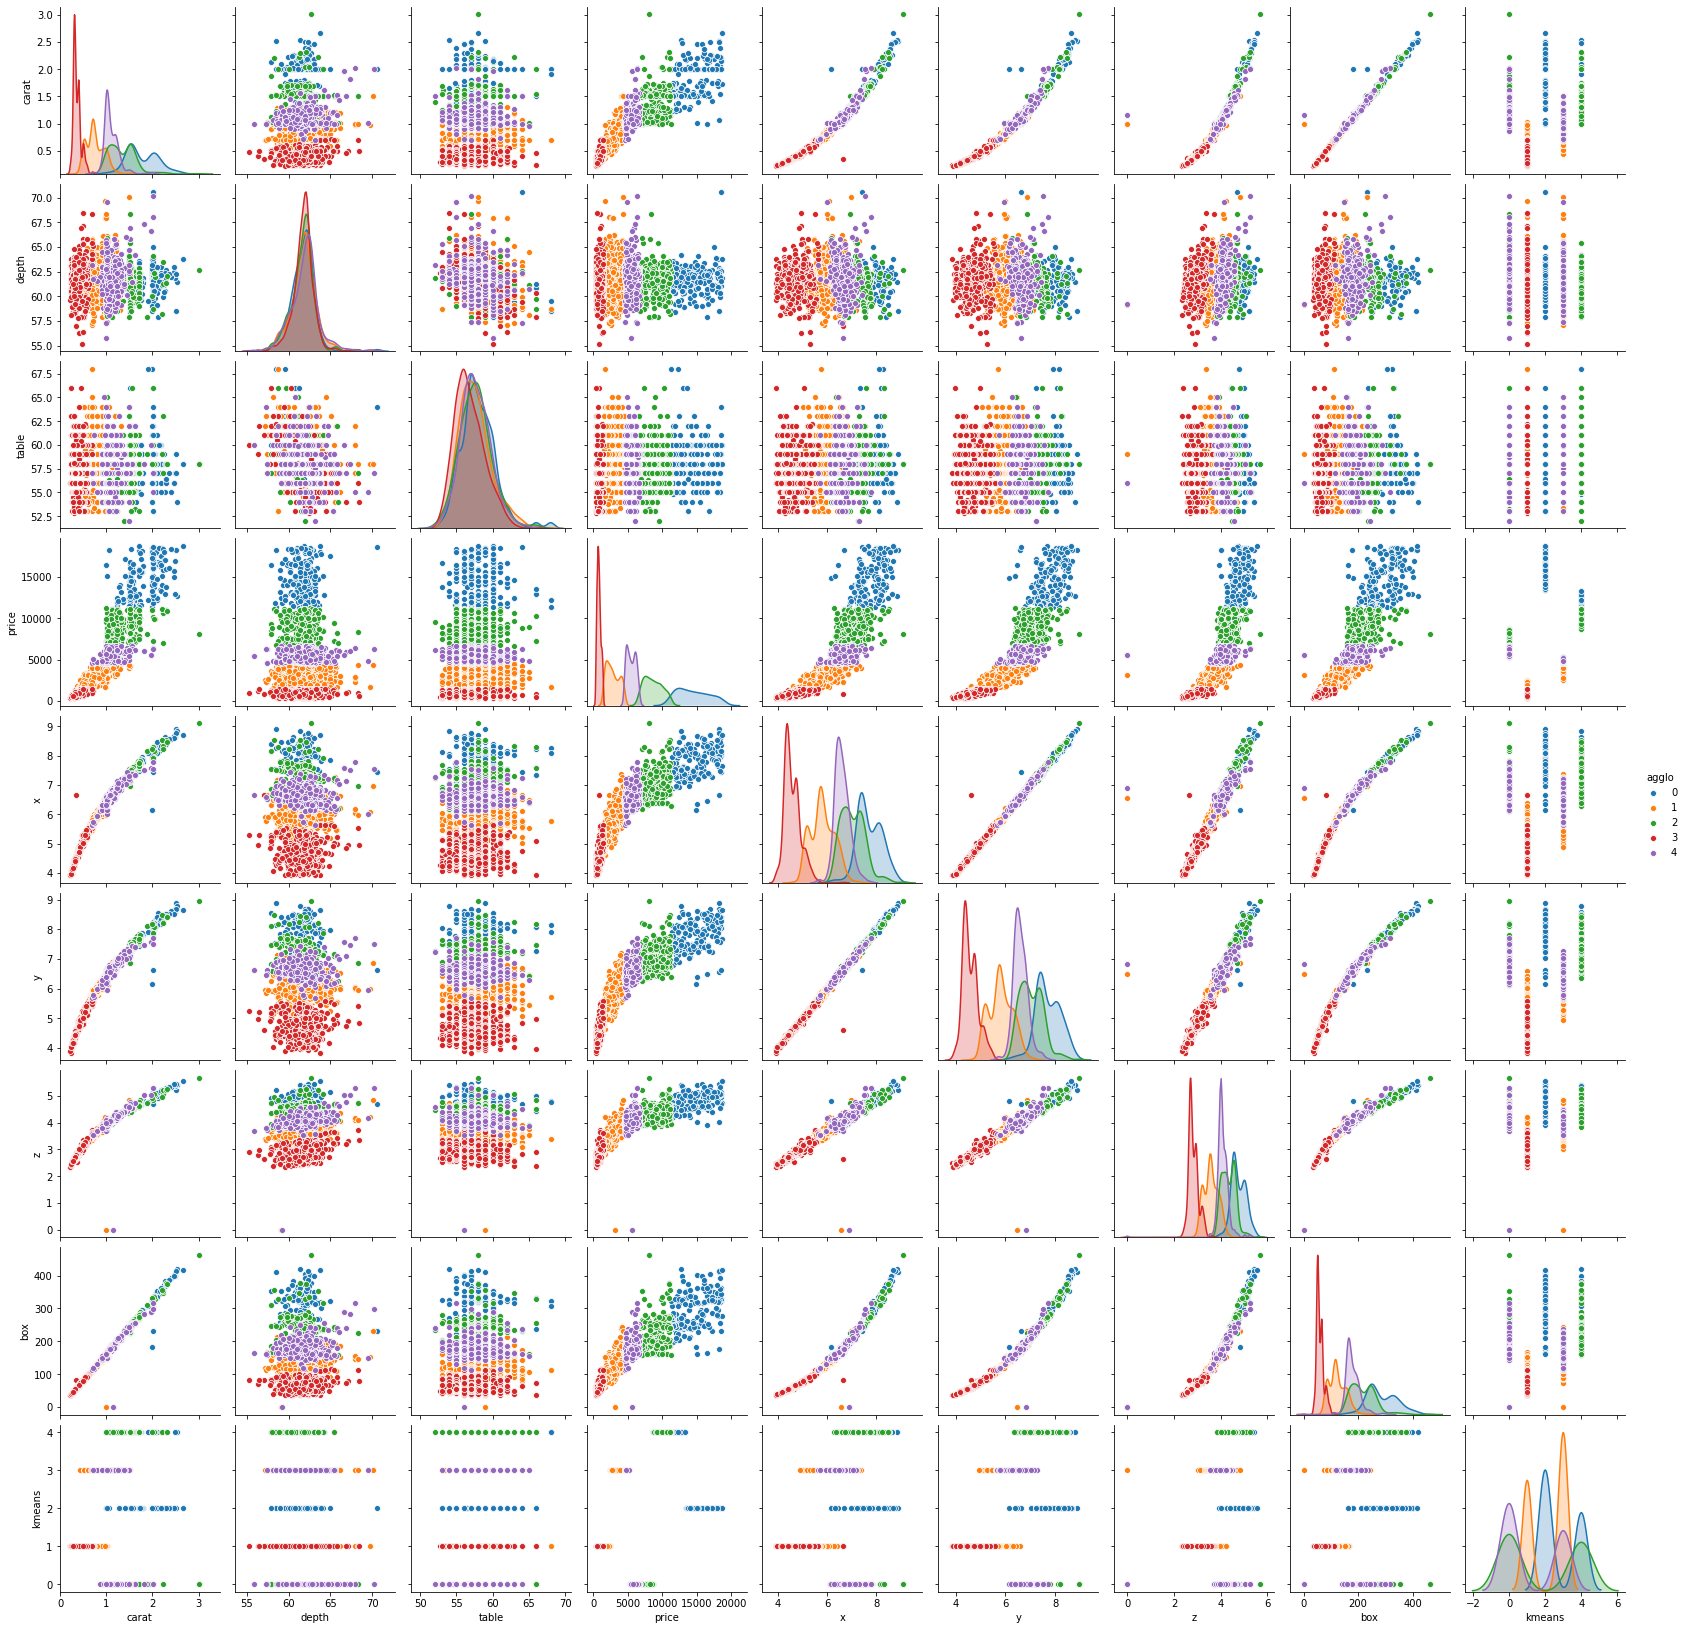

In [0]:
# Agglomerative clustering:

from sklearn.cluster import AgglomerativeClustering

clust_agglo = AgglomerativeClustering(n_clusters=5).fit(X) 
X['agglo']=clust_agglo.fit_predict(X)

sns.pairplot(X,hue='agglo')

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

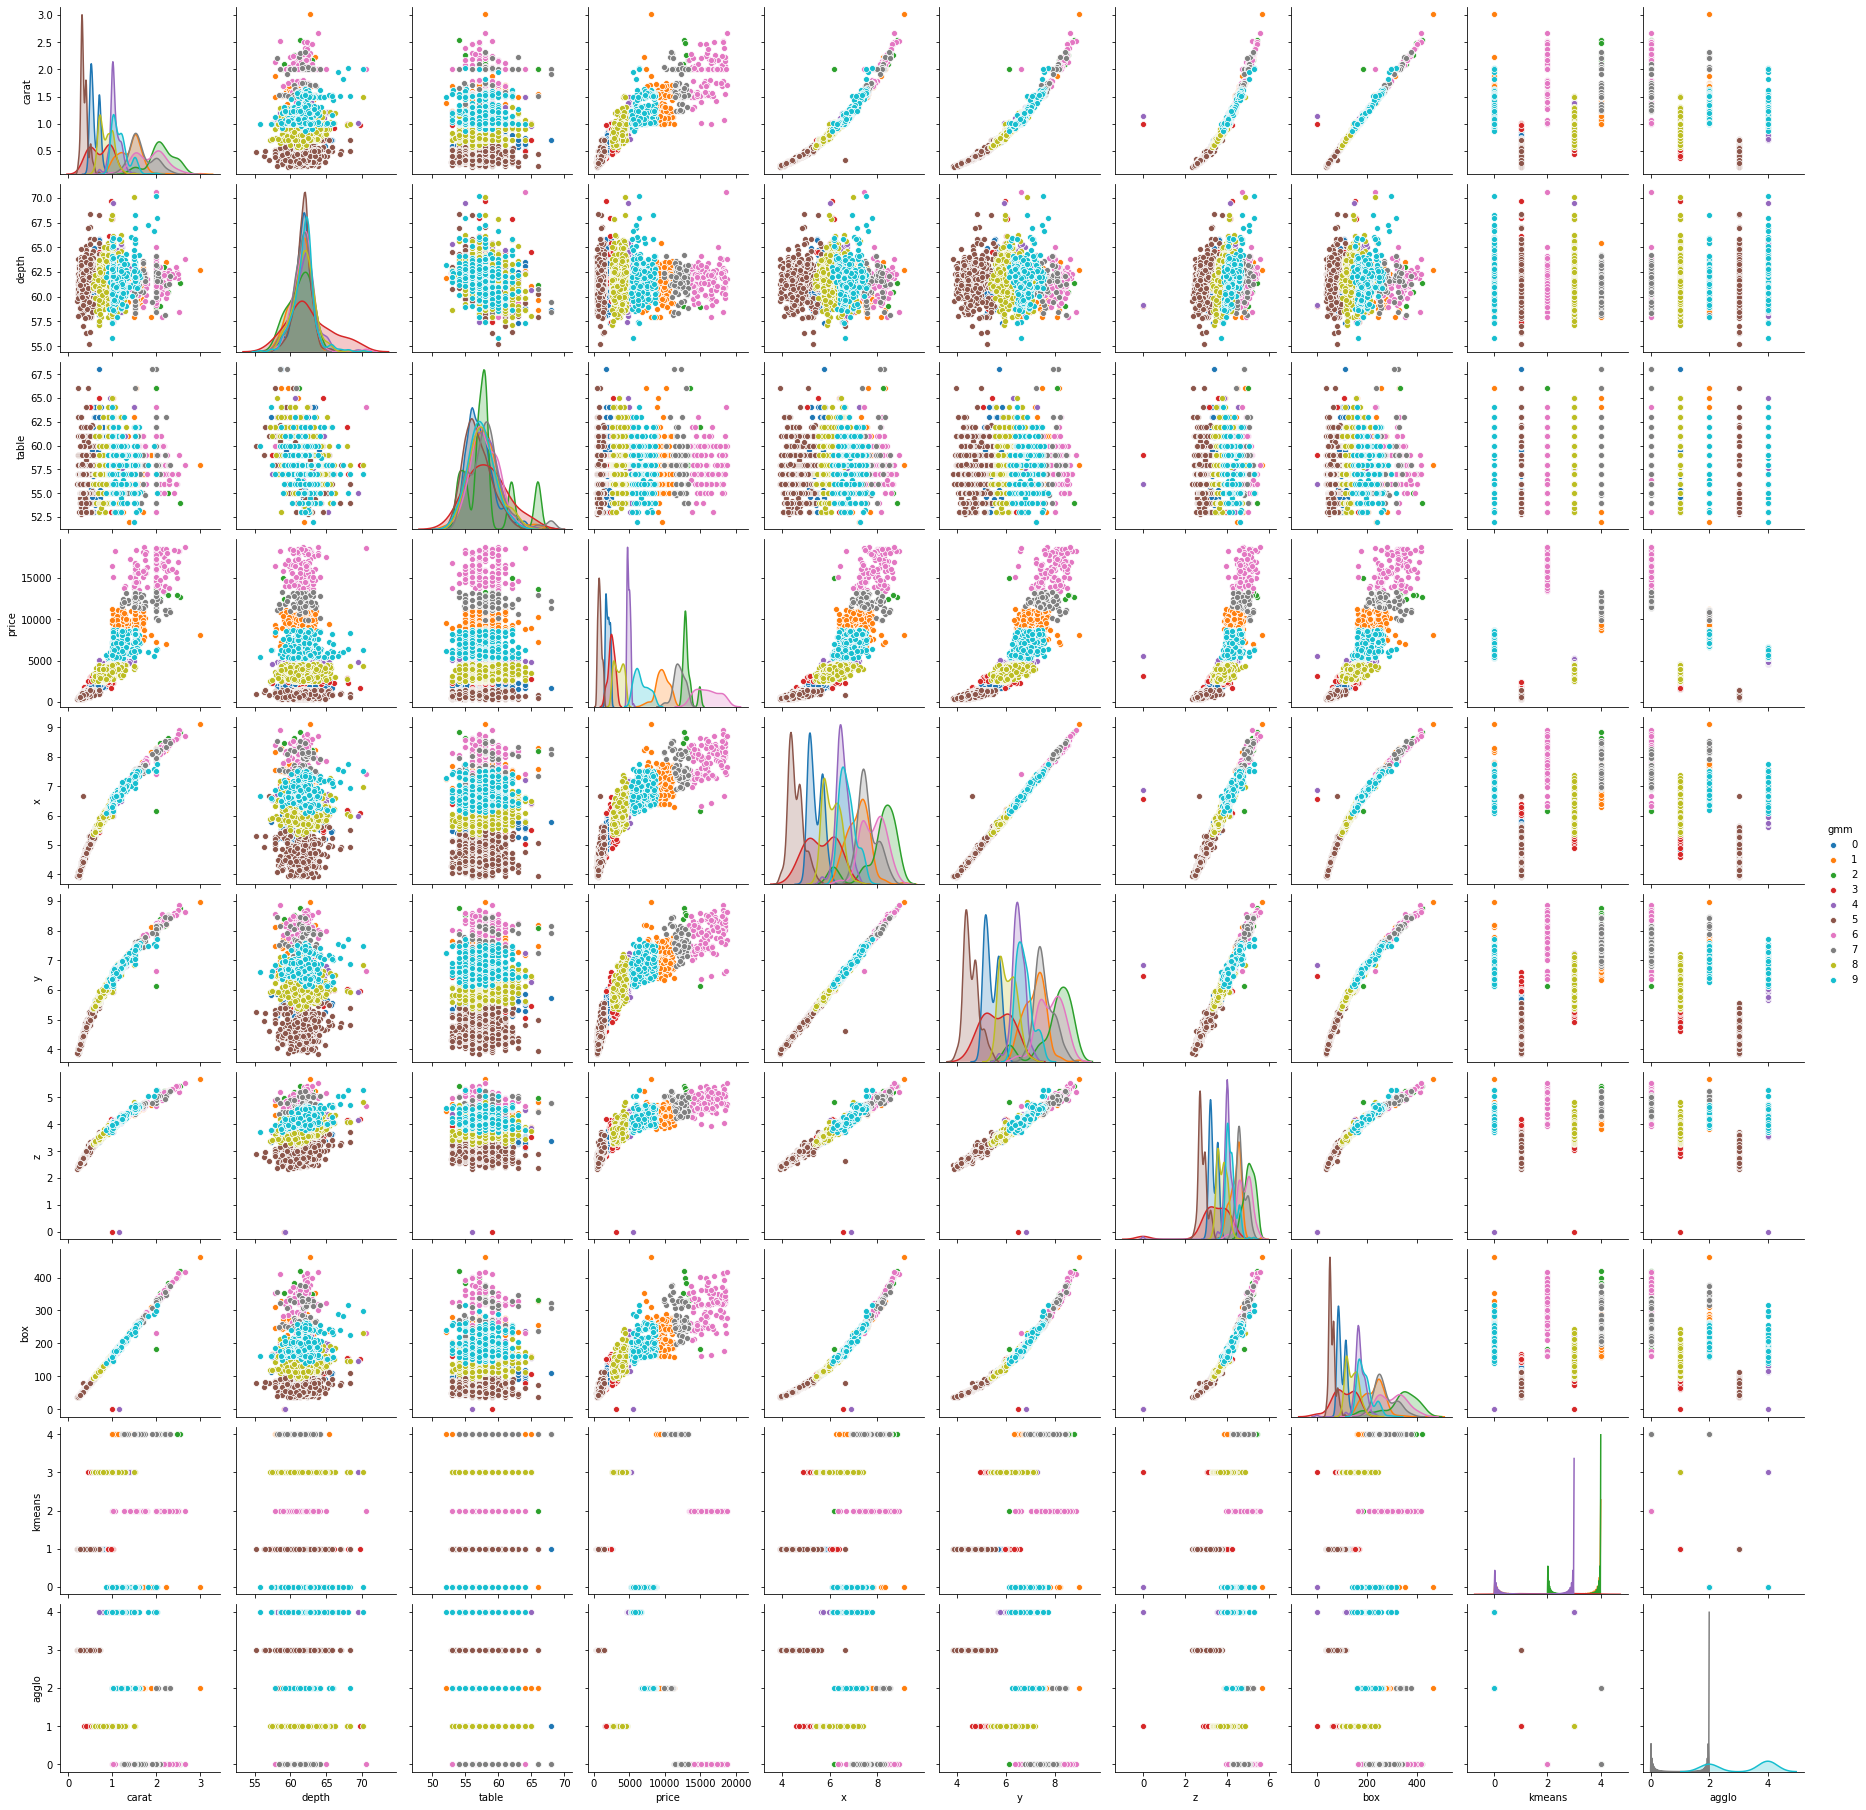

In [0]:
# GMM clustering:

from sklearn import mixture

clust_gmm = mixture.GaussianMixture(n_components=5,covariance_type='full').fit(X)
X['gmm']= gmm.fit_predict(X)

sns.pairplot(X,hue='gmm')

Tal y como se comenta en el apartado anterior, en los datos de éste dataframe se observa claramente un único cluster, no gausiano. Por este motivo, habiendo realizado los pairplot para las 3 técnicas de clustering, observamos que el ajuste de estos clusters con los datos disponibles no parece del todo correcto. Aún así se observan claras diferencias en la forma que estos algorismos asignan clusters, motivo principal que los diferencia. A continuación también se muestra, para la técnica de agglomerative clustering, el dendograma por el cuál se asignan los datos a los distintos clusters (usando también el dataframe reducido).

{'color_list': ['g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'b',
  'c',
  'c',
  'c',
  'c',
  'm',
  'm',
  'm',
  'b',
  'y',
  'y',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'k',
  'b',
  'b',
  'b',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'g',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'r',
  'b',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'c',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'm',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',
  'y',

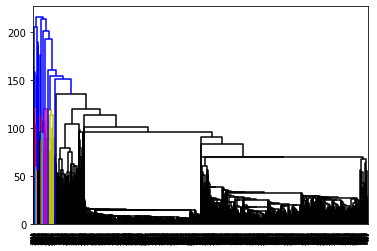

In [8]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

X = dm_red

clustering = AgglomerativeClustering(n_clusters=5).fit(X) 

Z = linkage(X)
dendrogram(Z)

# Parte 5: Regresión univariada

En éste apartado se realiza un análisi de regresión entre dos variables del dataframe. Observando el pairplot del inicio del proyecto podemos ver, por ejemplo, una posible relación entre la dimensión "**x**" del diamante y su valor de **carats**. Para estas dos variables, entonces, realizamos un análisi de regresión, utilizando diferentes modelos, y luego miraremos su representación gráfica junto con su parámetro AIC obtenido.

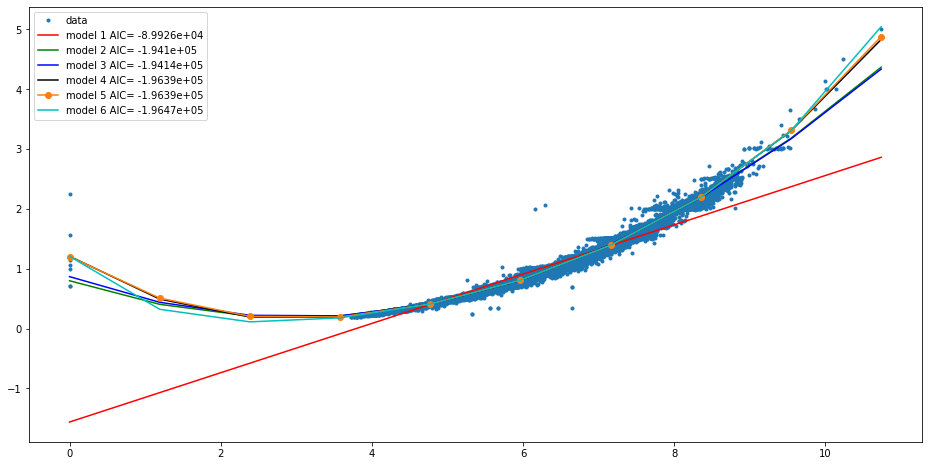

In [17]:
import pandas as pd 
import seaborn as sns 
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt

x = dm['x']
y = dm['carat']
X = sm.add_constant(x) # adds a first column to add an intercept (beta_0) to our model

# Modelo 1 (Lineal): y = a*x + b
model1 = sm.OLS(y, X)
model1 = model1.fit()

# Modelo 2 (Cuadrático): y = a*x^2 + b*x + c
X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
model2 = model2.fit()

# Modelo 3 (Orden 3):  y = a*x^3 + b*x^2 + c*x + d
X3 = np.column_stack((x, x**2, x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
model3 = model3.fit()

# Modelo 4 (Orden 3):  y = a*x^4 + b*x^3 + c*x^2 + d*x + e
X4 = np.column_stack((x, x**2, x**3,x**4))
X4 = sm.add_constant(X4) # adds a first column with ones
model4 = sm.OLS(y, X4)
model4 = model4.fit()

# Modelo 5 (Orden 5):  y = a*x^5 + b*x^4 + c*x^3 + d*x^2 + e*x + f
X5 = np.column_stack((x, x**2, x**3,x**4,x**5))
X5 = sm.add_constant(X5) # adds a first column with ones
model5 = sm.OLS(y, X5)
model5 = model5.fit()

# Modelo 6 (Orden 6):  y = a*x^6 + b*x^5 + c*x^4 + d*x^3 + e*x^2 + f*x + g
X6 = np.column_stack((x, x**2, x**3,x**4,x**5,x**6))
X6 = sm.add_constant(X6) # adds a first column with ones
model6 = sm.OLS(y, X6)
model6 = model6.fit()

x_predict = np.linspace(x.min(),x.max(),10)

X_pred = sm.add_constant(x_predict) # adds a first column to add an intercept (beta_0) to our model

X2_pred = np.column_stack((x_predict, x_predict**2))
X2_pred = sm.add_constant(X2_pred) # adds a first column to add an intercept (beta_0) to our model
X3_pred = np.column_stack((x_predict, x_predict**2,x_predict**3))
X3_pred = sm.add_constant(X3_pred) # adds a first column to add an intercept (beta_0) to our model
X4_pred = np.column_stack((x_predict, x_predict**2,x_predict**3,x_predict**4))
X4_pred = sm.add_constant(X4_pred) # adds a first column to add an intercept (beta_0) to our model
X5_pred = np.column_stack((x_predict, x_predict**2,x_predict**3,x_predict**4,x_predict**5))
X5_pred = sm.add_constant(X5_pred) # adds a first column to add an intercept (beta_0) to our model
X6_pred = np.column_stack((x_predict, x_predict**2,x_predict**3,x_predict**4,x_predict**5,x_predict**6))
X6_pred = sm.add_constant(X6_pred) # adds a first column to add an intercept (beta_0) to our model

y1_predict = model1.predict(X_pred)
y2_predict = model2.predict(X2_pred)
y3_predict = model3.predict(X3_pred)
y4_predict = model4.predict(X4_pred)
y5_predict = model5.predict(X5_pred)
y6_predict = model6.predict(X6_pred)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y, '.', label="data")
ax.plot(x_predict, y1_predict, 'r-', label="model 1 AIC= {:.5}".format(model1.aic))
ax.plot(x_predict, y2_predict, 'g-', label="model 2 AIC= {:.5}".format(model2.aic))
ax.plot(x_predict, y3_predict, 'b-', label="model 3 AIC= {:.5}".format(model3.aic))
ax.plot(x_predict, y4_predict, 'k-', label="model 4 AIC= {:.5}".format(model4.aic))
ax.plot(x_predict, y5_predict, 'o-', label="model 5 AIC= {:.5}".format(model5.aic))
ax.plot(x_predict, y6_predict, 'c-', label="model 6 AIC= {:.5}".format(model6.aic))

ax.legend()
plt.show()

De la regresión vemos que los todos los modelos (excepto el lineal) se adaptan relativamente bien a los datos, con un parámetro AIC muy bajo. De entre ellos, el modelo de orden 6 parece ser el que mejor representa los datos. Aún así se observa un posible fallo en los datos que puede provocar una menor precisión del modelo. Vemos que para la variable "x" existen **valores 0**, lo cuál no es posible en la realidad y se puede tratar de un error del dataframe. Para mejorar el análisis realizamos de nuevo el proceso pero sin tener en cuenta estos valores. 

In [11]:
dm_x0 = dm.drop( dm[ dm['x'] == 0 ].index)
dm_x0.describe()

carat         depth  ...             z           box
count  53932.000000  53932.000000  ...  53932.000000  53932.000000
mean       0.797879     61.749336  ...      3.539259    129.868665
std        0.473986      1.432514  ...      0.704434     78.235079
min        0.200000     43.000000  ...      0.000000      0.000000
25%        0.400000     61.000000  ...      2.910000     65.161678
50%        0.700000     61.800000  ...      3.530000    114.811404
75%        1.040000     62.500000  ...      4.040000    170.844468
max        5.010000     79.000000  ...     31.800000   3840.598060

[8 rows x 8 columns]

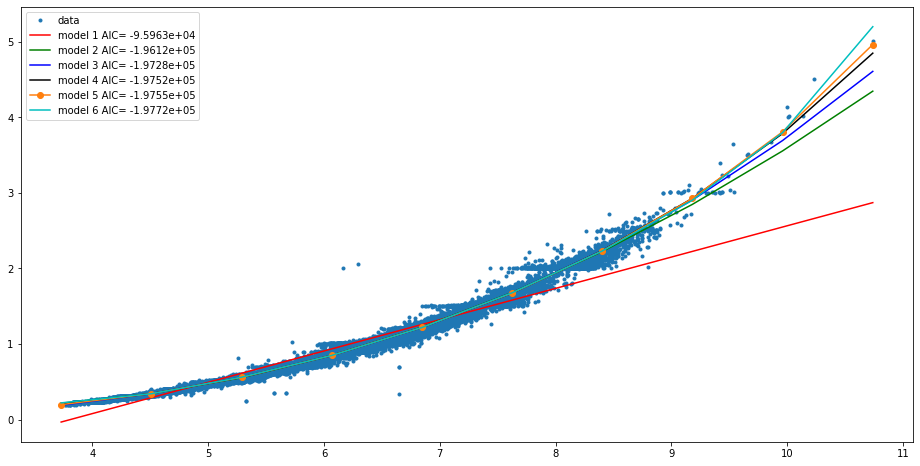

In [13]:
x = dm_x0['x']
y = dm_x0['carat']
X = sm.add_constant(x) # adds a first column to add an intercept (beta_0) to our model

# Modelo 1 (Lineal): y = a*x + b
model1 = sm.OLS(y, X)
model1 = model1.fit()

# Modelo 2 (Cuadrático): y = a*x^2 + b*x + c
X2 = np.column_stack((x, x**2))
X2 = sm.add_constant(X2) # adds a first column with ones
model2 = sm.OLS(y, X2)
model2 = model2.fit()

# Modelo 3 (Orden 3):  y = a*x^3 + b*x^2 + c*x + d
X3 = np.column_stack((x, x**2, x**3))
X3 = sm.add_constant(X3) # adds a first column with ones
model3 = sm.OLS(y, X3)
model3 = model3.fit()

# Modelo 4 (Orden 3):  y = a*x^4 + b*x^3 + c*x^2 + d*x + e
X4 = np.column_stack((x, x**2, x**3,x**4))
X4 = sm.add_constant(X4) # adds a first column with ones
model4 = sm.OLS(y, X4)
model4 = model4.fit()

# Modelo 5 (Orden 5):  y = a*x^5 + b*x^4 + c*x^3 + d*x^2 + e*x + f
X5 = np.column_stack((x, x**2, x**3,x**4,x**5))
X5 = sm.add_constant(X5) # adds a first column with ones
model5 = sm.OLS(y, X5)
model5 = model5.fit()

# Modelo 6 (Orden 6):  y = a*x^6 + b*x^5 + c*x^4 + d*x^3 + e*x^2 + f*x + g
X6 = np.column_stack((x, x**2, x**3,x**4,x**5,x**6))
X6 = sm.add_constant(X6) # adds a first column with ones
model6 = sm.OLS(y, X6)
model6 = model6.fit()

x_predict = np.linspace(x.min(),x.max(),10)

X_pred = sm.add_constant(x_predict) # adds a first column to add an intercept (beta_0) to our model

X2_pred = np.column_stack((x_predict, x_predict**2))
X2_pred = sm.add_constant(X2_pred) # adds a first column to add an intercept (beta_0) to our model
X3_pred = np.column_stack((x_predict, x_predict**2,x_predict**3))
X3_pred = sm.add_constant(X3_pred) # adds a first column to add an intercept (beta_0) to our model
X4_pred = np.column_stack((x_predict, x_predict**2,x_predict**3,x_predict**4))
X4_pred = sm.add_constant(X4_pred) # adds a first column to add an intercept (beta_0) to our model
X5_pred = np.column_stack((x_predict, x_predict**2,x_predict**3,x_predict**4,x_predict**5))
X5_pred = sm.add_constant(X5_pred) # adds a first column to add an intercept (beta_0) to our model
X6_pred = np.column_stack((x_predict, x_predict**2,x_predict**3,x_predict**4,x_predict**5,x_predict**6))
X6_pred = sm.add_constant(X6_pred) # adds a first column to add an intercept (beta_0) to our model

y1_predict = model1.predict(X_pred)
y2_predict = model2.predict(X2_pred)
y3_predict = model3.predict(X3_pred)
y4_predict = model4.predict(X4_pred)
y5_predict = model5.predict(X5_pred)
y6_predict = model6.predict(X6_pred)

fig, ax = plt.subplots(figsize=(16,8))
ax.plot(x, y, '.', label="data")
ax.plot(x_predict, y1_predict, 'r-', label="model 1 AIC= {:.5}".format(model1.aic))
ax.plot(x_predict, y2_predict, 'g-', label="model 2 AIC= {:.5}".format(model2.aic))
ax.plot(x_predict, y3_predict, 'b-', label="model 3 AIC= {:.5}".format(model3.aic))
ax.plot(x_predict, y4_predict, 'k-', label="model 4 AIC= {:.5}".format(model4.aic))
ax.plot(x_predict, y5_predict, 'o-', label="model 5 AIC= {:.5}".format(model5.aic))
ax.plot(x_predict, y6_predict, 'c-', label="model 6 AIC= {:.5}".format(model6.aic))

ax.legend()
plt.show()

Sin los datos aparentemente erróneos vemos que ahora la regresión es aún mejor, y especialmente para todos los modelos menos el lineal parece que la presición de estos es muy buena, siendo el modelo de **orden 6** el que mejor representa los datos.